# All Data - NLP EDA

In [1]:
# Flag for if you are running this on the sample dataset
sample = False
# Modify this path as needed to run on your machine
sample_path = r'~\Box\STAT 222 Capstone\Intermediate Data\All_Data\all_data_fixed_quarter_dates_sample.csv'

In [2]:
# Packages
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

In [3]:
# Load in sample csv, or full parquet file
if sample:
    df = pd.read_csv(sample_path)
else:
    df = pd.read_parquet(r'~\Box\STAT 222 Capstone\Intermediate Data\All_Data\all_data_fixed_quarter_dates.parquet') 
df

,ticker,fixed_quarter_date,earnings_call_date,Rating,Rating Agency Name,rating_date,Source,Rating Rank AAA is 10,Next Rating,Next Rating Date,...,Change Direction Since Last Fixed Quarter Date,Change Since Last Fixed Quarter Date,Ticker,Description,Company Name,Sector,Industry Group,Industry,Sub-Industry,Comment
0,AAPL,2014-07-01 00:00:00.000000,2014-04-23,AA,Standard & Poor's Ratings Services,2014-05-27,Supplementary,9,AA,2015-02-18,...,None,NaN,AAPL,"Apple Inc. (Apple) designs, manufactures and m...",APPLE INC,Information Technology,Technology Hardware & Equipment,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals","Manufacturers of cellular phones, personal com..."
1,AAPL,2014-10-01 00:00:00.000000,2014-07-22,AA,Standard & Poor's Ratings Services,2014-05-27,Supplementary,9,AA,2015-02-18,...,Same As Last Fixed Quarter Date,0.0,AAPL,"Apple Inc. (Apple) designs, manufactures and m...",APPLE INC,Information Technology,Technology Hardware & Equipment,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals","Manufacturers of cellular phones, personal com..."
2,AAPL,2015-01-01 00:00:00.000000,2014-10-20,AA,Standard & Poor's Ratings Services,2014-05-27,Supplementary,9,AA,2015-02-18,...,Same As Last Fixed Quarter Date,0.0,AAPL,"Apple Inc. (Apple) designs, manufactures and m...",APPLE INC,Information Technology,Technology Hardware & Equipment,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals","Manufacturers of cellular phones, personal com..."
3,AAPL,2015-04-01 00:00:00.000000,2015-01-27,AA,Standard & Poor's Ratings Services,2015-02-18,Supplementary,9,AA,2015-05-28,...,Same As Last Fixed Quarter Date,0.0,AAPL,"Apple Inc. (Apple) designs, manufactures and m...",APPLE INC,Information Technology,Technology Hardware & Equipment,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals","Manufacturers of cellular phones, personal com..."
4,AAPL,2015-07-01 00:00:00.000000,2015-04-27,AA,Standard & Poor's Ratings Services,2015-06-02,Supplementary,9,AA,2015-08-25,...,Same As Last Fixed Quarter Date,0.0,AAPL,"Apple Inc. (Apple) designs, manufactures and m...",APPLE INC,Information Technology,Technology Hardware & Equipment,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals","Manufacturers of cellular phones, personal com..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7329,ZTS,2015-10-01 00:00:00.000000,2015-08-04,BBB,Standard & Poor's Ratings Services,2015-01-30,Both,7,BBB,2015-11-03,...,Same As Last Fixed Quarter Date,0.0,ZTS,"Zoetis Inc. is focused on the discovery, devel...",ZOETIS INC,Health Care,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals,Pharmaceuticals,"Companies engaged in the research, development..."
7330,ZTS,2016-01-01 00:00:00.000000,2015-11-03,BBB,Standard & Poor's Ratings Services,2015-11-03,Supplementary,7,BBB,2016-01-22,...,Same As Last Fixed Quarter Date,0.0,ZTS,"Zoetis Inc. is focused on the discovery, devel...",ZOETIS INC,Health Care,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals,Pharmaceuticals,"Companies engaged in the research, development..."
7331,ZTS,2016-04-01 00:00:00.000000,2016-02-16,BBB,Standard & Poor's Ratings Services,2016-01-22,Both,7,BBB,2016-12-23,...,Same As Last Fixed Quarter Date,0.0,ZTS,"Zoetis Inc. is focused on the discovery, devel...",ZOETIS INC,Health Care,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals,Pharmaceuticals,"Companies engaged in the research, development..."
7332,ZTS,2016-07-01 00:00:00.000000,2016-05-04,BBB,Standard & Poor's Ratings Services,2016-01-22,Both,7,BBB,2016-12-23,...,Same As Last Fixed Quarter Date,0.0,ZTS,"Zoetis Inc. is focused on the discovery, devel...",ZOETIS INC,Health Care,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals,Pharmaceuticals,"Companies engaged in the research, developm

In [4]:
# Basic Statistics
num_records = len(df)
avg_length = df['transcript'].str.len().mean()

print(f"Number of records: {num_records}")
print(f"Average transcript length: {avg_length:.2f} characters")

Number of records: 7334
Average transcript length: 49619.00 characters


In [5]:
# Tokenize the text
nltk.download('punkt')  # Download NLTK tokenizer data
tokens = df['transcript'].apply(word_tokenize)

# Remove stop words
nltk.download('stopwords')  # Download NLTK stop words data
stop_words = set(stopwords.words('english'))
tokens = tokens.apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words and word.isalpha()])

# Number of sentences
sentences = df['transcript'].apply(nltk.sent_tokenize)
num_sentences = sentences.apply(len)
print('average number of sentences:', num_sentences.mean())

# Sentence length
sentence_lengths = sentences.apply(lambda x: [len(word_tokenize(sentence)) for sentence in x])
sentence_lengths = sentence_lengths.explode()
print('average sentence length:', sentence_lengths.mean())

# Word Frequency Analysis
all_words = [word.lower() for token_list in tokens for word in token_list]
fdist = FreqDist(all_words)
top_words = fdist.most_common(10)
print("Top 10 most common words:")
for word, freq in top_words:
    print(f"{word}: {freq}")

# Plot Word Frequency Distribution
plt.figure(figsize=(10, 6))
fdist.plot(30, title='Top 30 Most Common Words')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ijyli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ijyli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


average number of sentences: 444.55576765748566


KeyboardInterrupt: 

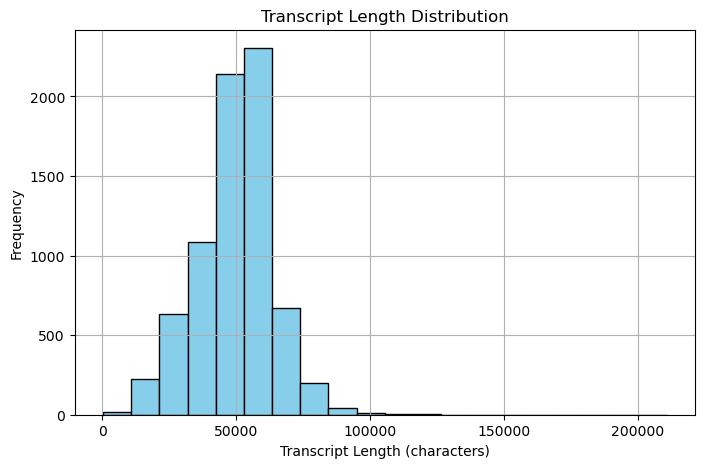

In [ ]:
# Text Length Distribution
transcript_lengths = df['transcript'].str.len()
plt.figure(figsize=(8, 5))
plt.hist(transcript_lengths, bins=20, color='skyblue', edgecolor='black')
plt.title('Transcript Length Distribution')
plt.xlabel('Transcript Length (characters)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

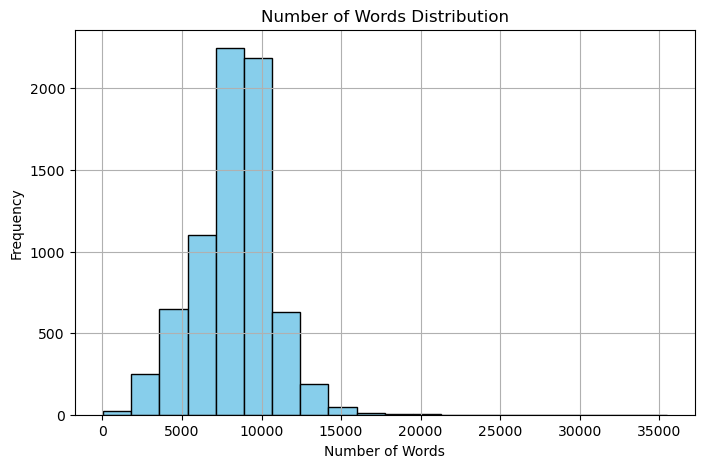

Average transcript length in words: 8249.85778565585


In [ ]:
# Distribution of Number of Words in earning calls 
def count_words(tokens):
    tokens = [word.lower() for word in tokens if word.isalpha()]
    return len(tokens)

word_tokens = df['transcript'].apply(word_tokenize)
num_words = word_tokens.apply(count_words)

# add as column to dataframe
df['num_words'] = num_words

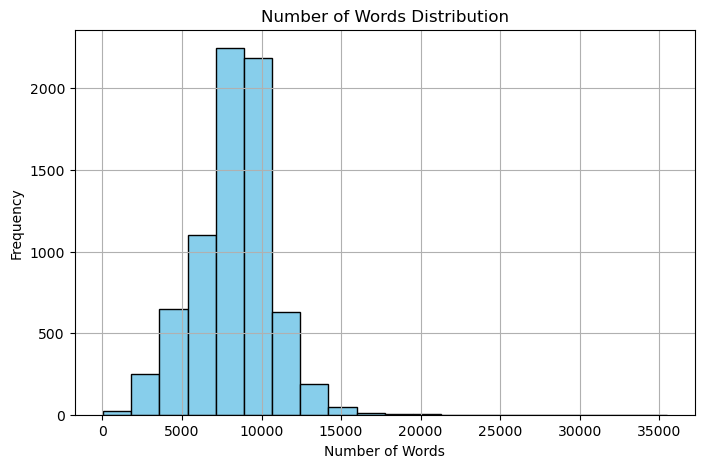

Average transcript length in words: 8249.85778565585


In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(num_words, bins=20, color='skyblue', edgecolor='black')
plt.title('Number of Words Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('../../../Output/all_data_num_words_distribution.png')
plt.show()

print('Average transcript length in words:', num_words.mean())

In [ ]:
# Average call length by credit rating

# Colored with gradient and ordered

# Colors AAA through D
# Used https://colordesigner.io/gradient-generator#google_vignette
# Assign hex codes from green to red
#32671d
#416703
#516600
#626400
#756000
#885b00
#9c5200
#af4500
#c33200
#d60000
hex_code_mapper = {'AAA': '#32671d', 'AA': '#416703', 'A': '#516600', 'BBB': '#626400', 'BB': '#756000', 'B': '#885b00', 'CCC': '#9c5200', 'CC': '#af4500', 'C': '#c33200', 'D': '#d60000'}

# Ordering of bars - keys from hex_code_mapper
bar_order = ['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC', 'CC', 'C', 'D']
# Assign values of Rating to this ordering
len_df = df.copy()
len_df['Rating'] = pd.Categorical(len_df['Rating'], categories=bar_order, ordered=True)
len_df = len_df.sort_values('Rating')

# Plot
plt.figure(figsize=(10, 6))
plt.bar(len_df['Rating'], len_df['num_words'], color=len_df['Rating'].map(hex_code_mapper))
plt.title('Average Call Length by Credit Rating')
plt.xlabel('Credit Rating')
plt.ylabel('Number of Words')
plt.savefig('../../../Output/all_data_call_length_by_credit_rating.png')
plt.show()

In [ ]:
del len_df

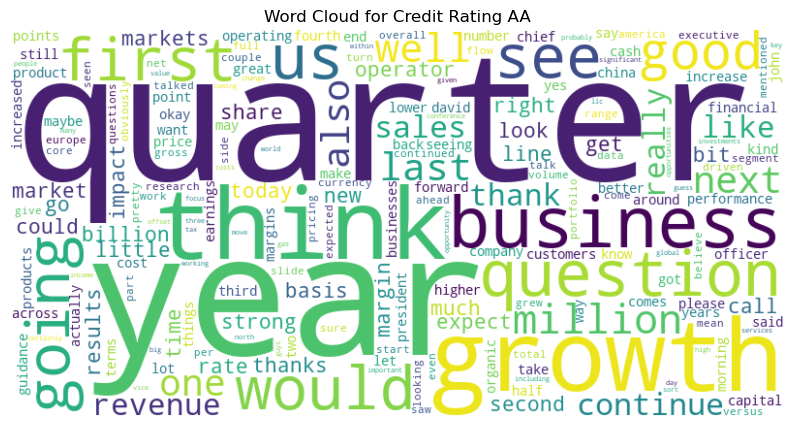

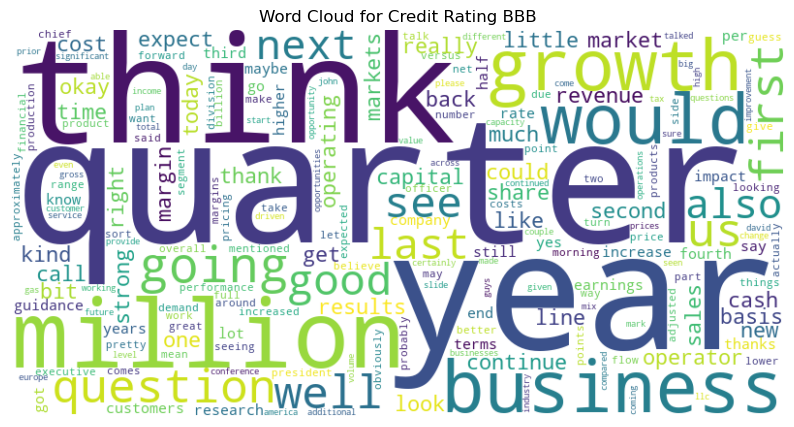

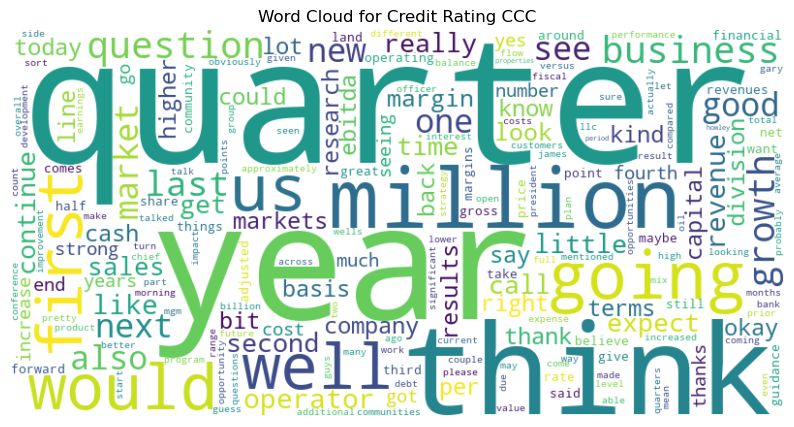

In [ ]:
from wordcloud import WordCloud

# Generate word clouds for each credit rating
ratings = ["AA","BBB","CCC"]
for rating in ratings:

    rating_df = df[df['Rating'] == rating]
    tokens = rating_df['transcript'].apply(word_tokenize)
    stop_words = set(stopwords.words('english'))
    tokens = tokens.apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words and word.isalpha()])
    
    all_words = [word.lower() for token_list in tokens for word in token_list]
    fdist = FreqDist(all_words)

    # Generate Word Cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(fdist)
    
    # Plot Word Cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Credit Rating {rating}')
    plt.show()

We can see from word cloud for credit rating AA, postive words like "growth" are larger when compared to credit rating CCC.

## Thank Yous

In the past we computed the frequency of all bigrams. We don't have memory for that anymore, but we found "Thank you" was a distinguisher between rating classes. So we will still instead investigate presence of the phrase "Thank You" in the data by rating.

In [ ]:
# Function to count presence of thank you (all caps) in transcript after it's been capitalized
def ty_count(transcript):
    cap_transcript = transcript.upper()
    return cap_transcript.count('THANK YOU')

# Looping over ratings
ratings = df['Rating'].unique()
average_ty_count = []
for rating in ratings:

    rating_df = df[df['Rating'] == rating]
    cnt = rating_df['transcript'].apply(ty_count)
    print('rating:', rating)
    print('average thank you count:', cnt.mean())
    average_ty_count.append(cnt.mean())

rating: AA
average thank you count: 14.861356932153392
rating: A
average thank you count: 12.47444204463643
rating: B
average thank you count: 11.52014010507881
rating: BB
average thank you count: 11.7
rating: AAA
average thank you count: 15.233576642335766
rating: BBB
average thank you count: 12.37975817286162
rating: CCC
average thank you count: 10.313513513513513
rating: CC
average thank you count: 8.571428571428571
rating: C
average thank you count: 13.0625
rating: D
average thank you count: 14.0


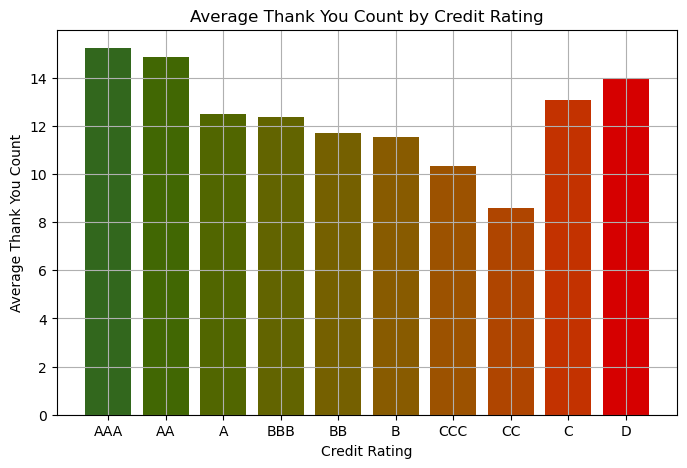

In [ ]:
# Put in dataframe
ty_df = pd.DataFrame({'Rating': ratings, 'Average Thank You Count': average_ty_count})

# Colored with gradient and ordered

# Colors AAA through D
# Used https://colordesigner.io/gradient-generator#google_vignette
# Assign hex codes from green to red
#32671d
#416703
#516600
#626400
#756000
#885b00
#9c5200
#af4500
#c33200
#d60000
hex_code_mapper = {'AAA': '#32671d', 'AA': '#416703', 'A': '#516600', 'BBB': '#626400', 'BB': '#756000', 'B': '#885b00', 'CCC': '#9c5200', 'CC': '#af4500', 'C': '#c33200', 'D': '#d60000'}

# Ordering of bars - keys from hex_code_mapper
bar_order = ['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC', 'CC', 'C', 'D']
# Assign values of Rating to this ordering
ty_df['Rating'] = pd.Categorical(ty_df['Rating'], categories=bar_order, ordered=True)
ty_df = ty_df.sort_values('Rating')

# Plot
plt.figure(figsize=(8, 5))
plt.bar(x='Rating', height='Average Thank You Count', data=ty_df, color=[hex_code_mapper[i] for i in bar_order])
plt.title('Average Thank You Count by Credit Rating')
plt.xlabel('Credit Rating')
plt.ylabel('Average Thank You Count')
plt.grid(True)
plt.savefig('../../../Output/all_data_average_thank_you_count.png')
plt.show()

In [ ]:
# boxplot of the bar chart
plt.figure(figsize=(8, 5))
sns.boxplot(x='Rating', y='Average Thank You Count', data=ty_df, order=bar_order, palette=[hex_code_mapper[i] for i in bar_order])
plt.title('Average Thank You Count by Credit Rating')
plt.xlabel('Credit Rating')
plt.ylabel('Average Thank You Count')
plt.grid(True)
plt.savefig('../../../Output/all_data_average_thank_you_count_boxplot.png')
plt.show()

Thank yous become far less common as credit rating deteriorates (with exceptions on the low end, but then again, sample size is very small there)!